In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [131]:
df=pd.read_csv("D:\\my_ml_vid\\loanprediction_class\\train_data.csv")
df.sample(6)
df.shape

(614, 13)

In [132]:
df.Credit_History.unique()

array([1.000000, 0.000000, nan])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [134]:
# handling missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

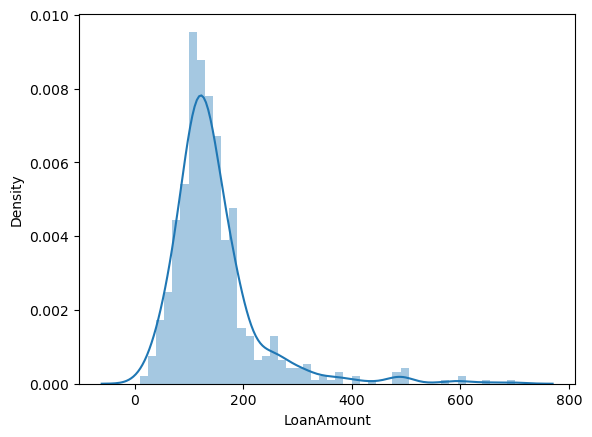

In [136]:
# visualize the data
sn.distplot(df['LoanAmount'])  # it is left skewwed

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

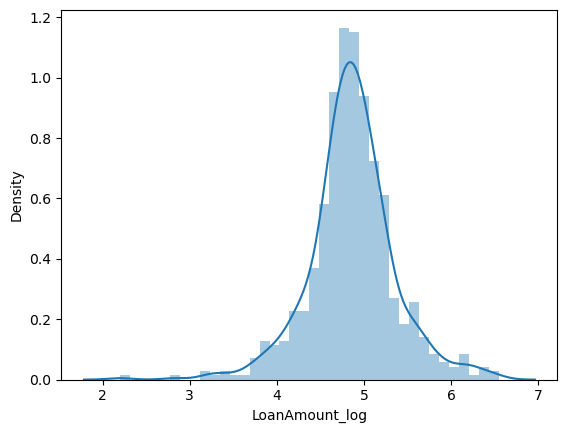

In [137]:
# for converting in normal distribution
df['LoanAmount_log']=np.log(df['LoanAmount'])
sn.distplot(df['LoanAmount_log'])


In [138]:
# combine applicant income and coapplicant income
df['Total income']=df['ApplicantIncome']+df['CoapplicantIncome']

<AxesSubplot:>

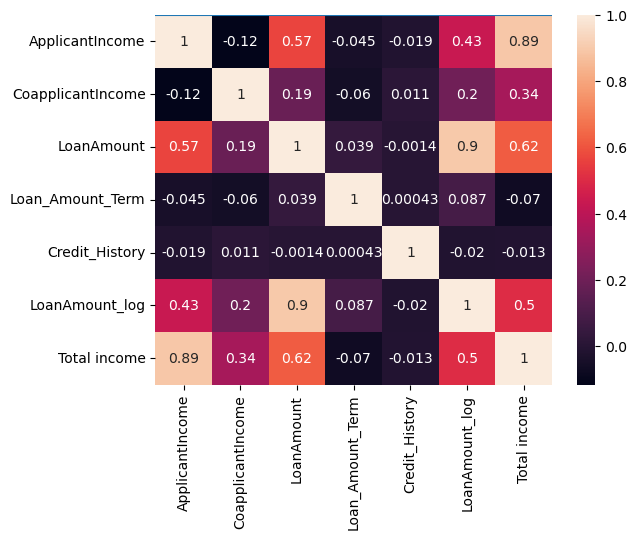

In [139]:
sn.distplot(df['Total income']) # left skewed
sn.heatmap(df.corr(),annot=True)

In [140]:
#converting in normal dist
df['Total_income_log']=np.log(df['Total income'])

<AxesSubplot:xlabel='Total_income_log', ylabel='Density'>

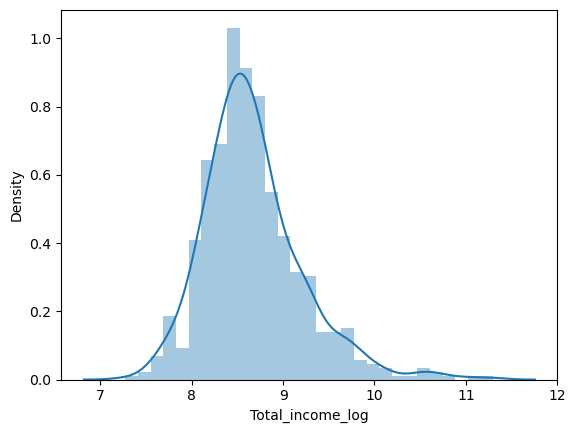

In [141]:
sn.distplot(df['Total_income_log'])

In [142]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total income         0
Total_income_log     0
dtype: int64

In [143]:
# encoding of categorical col
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Rural':0,'Urban':2})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [144]:
# change dependent col datatype
#df['Dependents']=df['Dependents'].astype('float')  gving erroe because it has a value 3+
df['Dependents']=df['Dependents'].str.replace('3[+]','4',regex=True)
df['Dependents']=df['Dependents'].astype('float')
df.shape

(614, 16)

In [145]:
#df['apli_in_log']=np.log(df['ApplicantIncome'])
#df['coap_in_log']=np.log(df['CoapplicantIncome'])


<AxesSubplot:>

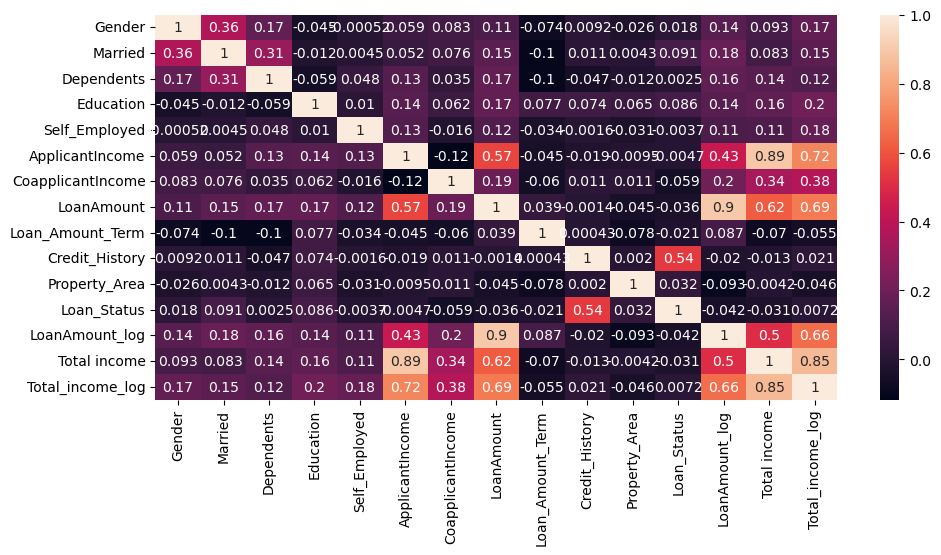

In [146]:
plt.figure(figsize=(11,5))
sn.heatmap(df.corr(),annot=True)

In [147]:
# droping extra col
df=df.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID','LoanAmount','Total income'])

In [148]:
# extracting features and target
#X=df.iloc[:,np.r_[1,3:5,6:9,10]].values
#y=df.loc[:,'Loan_Status'].values
X=df.drop(columns='Loan_Status').values
y=df['Loan_Status'].values

In [149]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [150]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)

In [151]:
from sklearn.feature_selection import f_classif
svalue,pvalue=f_classif(x_smote,y_smote)
svalue

array([0.000014, 4.602914, 0.072070, 3.871074, 1.710228, 0.773450,
       309.759566, 1.412104, 4.431623, 0.010570])

In [152]:
np.where(svalue>=.25)  # giving index where values are satisfying condition

(array([1, 3, 4, 5, 6, 7, 8], dtype=int64),)

In [153]:
# feature selection on the bases of svalue
X_new=df.iloc[:,[1,3,5,6,7,8]].values

In [154]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income_log
0,1,0,0.0,1,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1.0,1,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0.0,1,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0.0,0,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0.0,1,0,360.0,1.0,2,1,4.948760,8.699515


In [155]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) 

In [170]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_new,y,random_state=6)

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [172]:
import warnings                      # warning message solution which comes t every execution on predict method
warnings.filterwarnings('ignore')

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model=KNeighborsClassifier()

gsv=GridSearchCV(model,param_grid={'n_neighbors':[3,5,7,9],'metric':['euclidean','minkowski'],'p':[1,2,3]},cv=5)
gsv.fit(x_train,y_train)
print("best score",gsv.best_score_)
gsv.best_params_

best score 0.9782608695652174


{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}

## Kneighbors model

In [174]:
model_kn=KNeighborsClassifier(metric='minkowski', n_neighbors= 5, p= 1)
model_kn.fit(x_train,y_train)
pred_test=model_kn.predict(x_test)
print("testing score ",model_kn.score(x_test,y_test))

testing score  0.9935064935064936


In [175]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [176]:
f1_score(y_test,pred_test,average=None)

array([0.989011, 0.995392])

In [177]:
precision_score(y_test,pred_test,average=None)

array([1.000000, 0.990826])

In [178]:
f1_score(y_test,pred_test)

0.9953917050691244

In [179]:
precision_score(y_test,pred_test)

0.9908256880733946

In [180]:
recall_score(y_test,pred_test,average=None)

array([0.978261, 1.000000])

## Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [191]:
model_dt=DecisionTreeClassifier()
#model_dt.fit(X_new,y)
#model_dt.score(x_test,y_test)

from sklearn.model_selection import cross_val_score
csv=cross_val_score(model_dt,X_new,y,cv=5)
csv.mean()
                               

1.0

## Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rd=RandomForestClassifier(n_estimators=5)
model_rd.fit(x_train,y_train)
model_rd.score(x_test,y_test)

1.0

## Test data

In [40]:
df1=pd.read_csv("D:\\my_ml_vid\\loanprediction_class\\test_data.csv")
df1.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(),inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace=True)

In [42]:
# encoding of categorical col
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Property_Area']=df1['Property_Area'].map({'Semiurban':1,'Rural':0,'Urban':2})
df1['Self_Employed']=df1['Self_Employed'].map({'Yes':1,'No':0})

In [43]:
df1['Dependents']=df1['Dependents'].str.replace('3[+]','4',regex=True)
df1['Dependents']=df1['Dependents'].astype('float')

In [44]:
# combine applicant income and coapplicant income
df1['Total income']=df1['ApplicantIncome']+df1['CoapplicantIncome']

In [65]:
sn.distplot(df1['Total income'])

In [46]:
import numpy as np

In [47]:
df1['Total_income_log']=np.log(df1['Total income'])

In [66]:
sn.distplot(df1['Total_income_log'])

In [49]:
df1.head()
df1.shape

(367, 14)

In [50]:
df1['LoanAmount_log']=np.log(df1['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

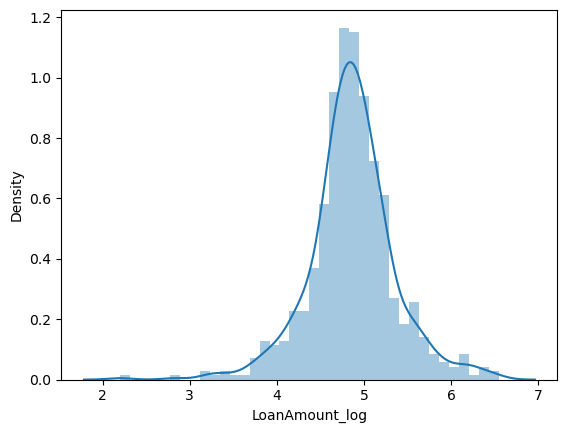

In [51]:
sn.distplot(df['LoanAmount_log'])

In [52]:
# droping extra col
df1=df1.drop(columns=['ApplicantIncome','CoapplicantIncome','Loan_ID','LoanAmount','Total income'])

In [53]:
XX=df1.loc[:,['Married','Education','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_log']].values

## Prediction on test data

In [54]:
#KNeighbors classifier
prediction=model_kn.predict(XX)
for i in prediction:
    if i==1:
        print("yes",end=" ")
    else:
        print("**no",end=" ")

yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes **no yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes

In [55]:
XX.shape

(367, 6)

In [58]:
## Decision tree
pred=model_dt.predict(XX)
pred_proba=model_dt.predict_proba(XX)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
